[0.722, 0.0304, 0.24760000000000001]


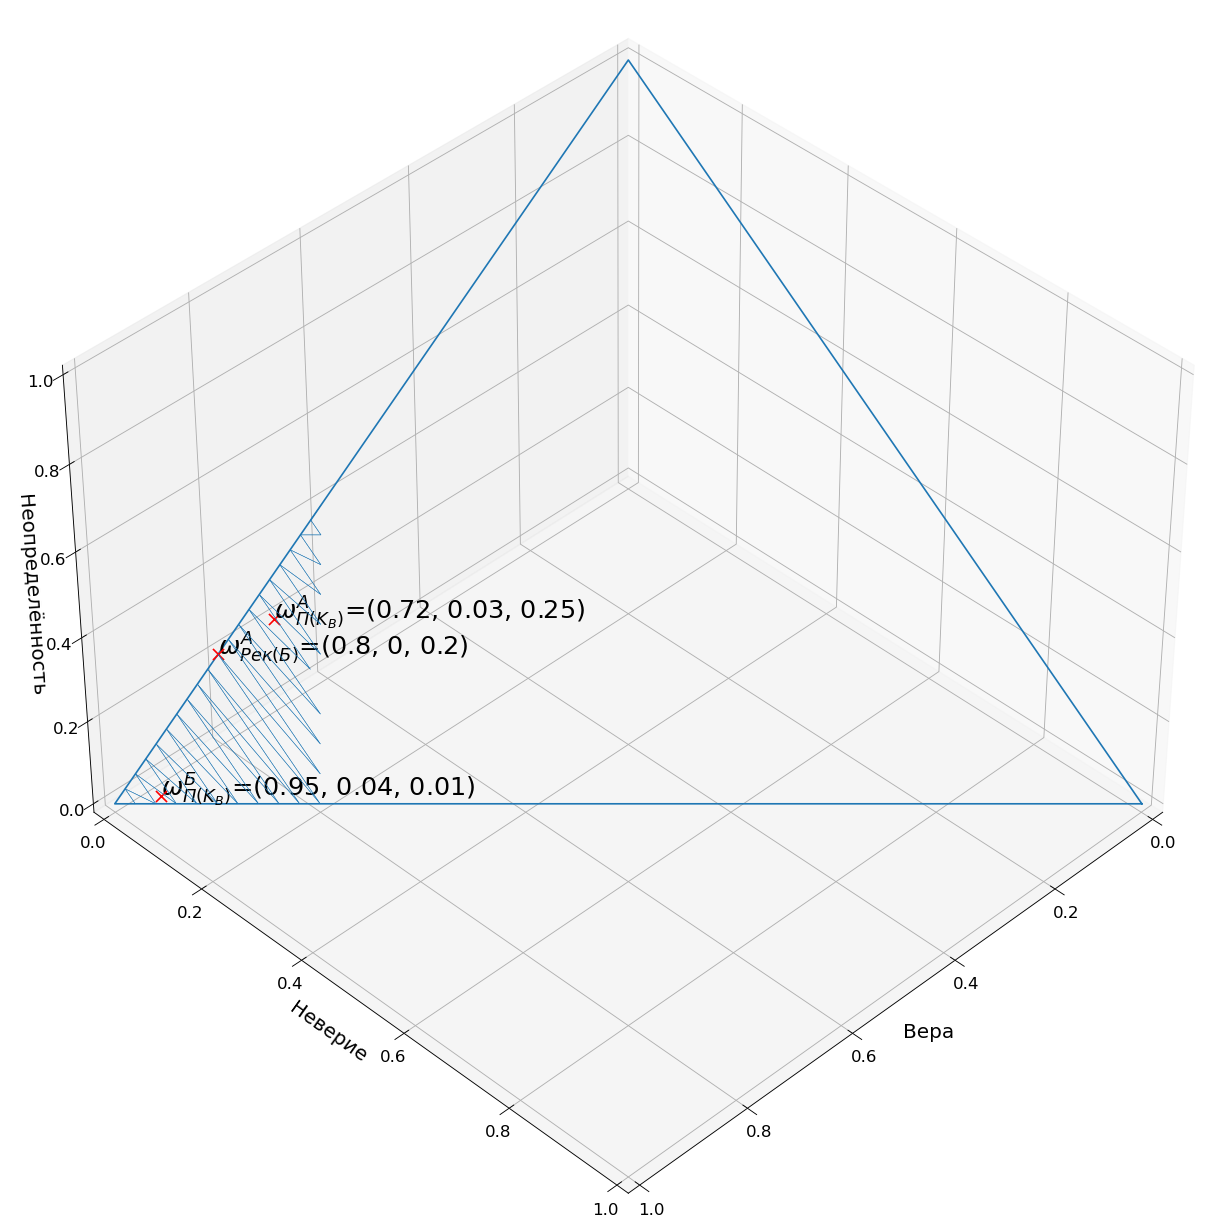

In [3]:
import itertools
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import arange,array

from trust import *


TRESHOLD = 0.8
LABELFONT = 18

def get_triangle_surf_data():
    st = arange(0,1.5,0.02)
    un = list(itertools.product(st,st,st))
    trian = list(filter(lambda x: sum(x)==1, un))
    return trian

def filter_triangle(trian):
    lam1 = lambda x: x[0] + x[2]/2>= TRESHOLD
    lam2 = lambda x: x[1] < TRESHOLD
    trian2 = list(filter( lam1 , trian))
    return trian2

def get_trian_lines():
    xs = [0,0,0,1,1,0]
    ys = [1,0,0,0,0,1]
    zs = [0,1,1,0,0,0]
    return xs,ys,zs

def points_to_axis(points):
    xs = [x[0] for x in points]
    ys = [x[1] for x in points]
    zs = [x[2] for x in points]
    return xs, ys, zs
    
def create_scene():
    fig = plt.figure(figsize=(20, 20), dpi=80)
    plt.rc('xtick', labelsize=15)  
    ax = plt.axes(projection='3d')
    ax.set_xlabel('Вера', fontsize=LABELFONT)
    ax.set_xlim(0, 1)
    ax.set_ylabel('Неверие', fontsize=LABELFONT)
    ax.set_ylim(0, 1)
    ax.set_zlabel('Неопределённость', fontsize=LABELFONT)
    ax.set_zlim(0, 1)
    ax.view_init(elev=40., azim=45)
    return ax

def plot_opinion(ax, opin, text='', marker='x'):
    value = f'=({round(opin[0],2)}, {round(opin[1],2)}, {round(opin[2],2)})'
    ax.scatter(*opin[:],s=100, marker=marker, color='red')
    ax.text(*opin[:], text+value, fontsize=LABELFONT+5)


d = get_cert_dict('output.crt')

wa_RT_b = Opinion((0.8, 0, 0.2))

opin = calc_root_cert_trust(d, wa_RT_b)
print(opin)

trian = get_triangle_surf_data()

trian2 = filter_triangle(trian)
trian3 = list(filter(lambda x: x[0] + x[2]/2<=TRESHOLD, trian))

X, Y, Z = points_to_axis(trian3)

X2, Y2, Z2 = points_to_axis(trian2)


ax = create_scene()

ax.plot(*get_trian_lines())

plt.savefig('trust_triangle.svg', format='svg',bbox_inches='tight')

#ax.plot_trisurf(X, Y, Z,linewidth=0.1, antialiased=True, cmap='gray')


ax.plot_wireframe(X2, Y2, array([Z2,Z2]), linewidth=0.4, antialiased=True, cmap='viridis')

plt.savefig('trust_triangle_trshold.svg', format='svg',bbox_inches='tight')

plot_opinion(ax, opin, '$\omega_{П(K_В)}^A$')
plot_opinion(ax, get_subject_op(d), '$\omega_{П(K_В)}^Б$')
plot_opinion(ax, wa_RT_b, '$\omega_{Рек(Б)}^A$')

plt.savefig('trust_opinions.svg', format='svg',bbox_inches='tight')
plt.show()